## Encoding Categóricos 

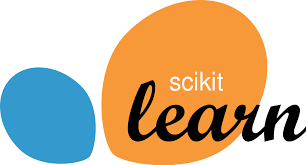

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

X = data.drop('price', axis=1)
y = data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [4]:
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<br>
<br>
<hr>
<hr>

## One Hot Enconding 

Codifica as Features categóricas como uma matriz numérica representativa.


A entrada para este transformador deve ser uma matriz de números inteiros ou seqüências, denotando os valores assumidos por recursos categóricos (discretos). Os recursos são codificados usando um esquema de codificação one-hot (aka 'one-of-K' ou 'dummy'). Isso cria uma coluna binária para cada categoria e retorna uma matriz esparsa ou matriz densa (dependendo do sparse parâmetro)


Essa codificação é necessária para alimentar dados categóricos para muitos estimadores de aprendizado de scikit, principalmente modelos lineares e SVMs com os kernels padrão.

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
ohe = OneHotEncoder(sparse=False)

data['fueltype'] = ohe.fit_transform(data[['fueltype']])
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0.0,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0.0,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0.0,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0.0,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0.0,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Categorias 
ohe.categories_

[array(['diesel', 'gas'], dtype=object)]

In [8]:
data['fueltype'].value_counts()

0.0    185
1.0     20
Name: fueltype, dtype: int64

<hr>
<br>
<hr>
<hr>

## Get Dummies 

Técnica de processamento de variáveis categóricas do Pandas. 

In [9]:
# Get_dummies
fuelsystem = pd.get_dummies(data['fuelsystem'], prefix='fuelsystem_')

# Concatenando 
data = pd.concat([data,fuelsystem], axis=1)

# Apagando coluna original 
data.drop(['fuelsystem'], axis=1, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<br>
<hr>
<br>
<hr>
<br>

## LabelEncoder

  Outra técnica de pré-processamento para variáveis categóricas. Aplicada bastante a variáveis Y (Label) que cria um vetor de 0 a Número de classes dentro da Coluna. 
  
Codifique os rótulos de destino com valor entre 0 e n_classes-1.
Este transformador deve ser usado para codificar os valores alvo, ou seja y , e não a entrada X.
  

In [11]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data['doornumber'] = label.fit_transform(data[['doornumber']])

In [12]:
# Classes 
label.classes_

array(['four', 'two'], dtype=object)

In [13]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [14]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,highwaympg,price,fuelsystem__1bbl,fuelsystem__2bbl,fuelsystem__4bbl,fuelsystem__idi,fuelsystem__mfi,fuelsystem__mpfi,fuelsystem__spdi,fuelsystem__spfi
0,1,3,alfa-romero giulia,0.0,std,1,convertible,rwd,front,88.6,...,27,13495.0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0.0,std,1,convertible,rwd,front,88.6,...,27,16500.0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0.0,std,1,hatchback,rwd,front,94.5,...,26,16500.0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0.0,std,0,sedan,fwd,front,99.8,...,30,13950.0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0.0,std,0,sedan,4wd,front,99.4,...,22,17450.0,0,0,0,0,0,1,0,0


<br>
<br>
<hr>
<hr>
<hr>
<hr>
<br>

## OrdinalEncoder 

Codifique recursos categóricos como uma matriz inteira.

A entrada para este transformador deve ser uma matriz de números inteiros ou seqüências, denotando os valores assumidos por recursos categóricos (discretos). Os recursos são convertidos em números inteiros ordinais. Isso resulta em uma única coluna de números inteiros (0 a n_categories - 1) por recurso.

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()


# Encoding 
data['drivewheel'] = ordinal.fit_transform(data[['drivewheel']])

# Verificando
data['drivewheel']

0      2.0
1      2.0
2      2.0
3      1.0
4      0.0
      ... 
200    2.0
201    2.0
202    2.0
203    2.0
204    2.0
Name: drivewheel, Length: 205, dtype: float64

In [16]:
# Categóricas antes da transformação 
ordinal.categories_

[array(['4wd', 'fwd', 'rwd'], dtype=object)]

In [17]:
# Após Transformação 
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,highwaympg,price,fuelsystem__1bbl,fuelsystem__2bbl,fuelsystem__4bbl,fuelsystem__idi,fuelsystem__mfi,fuelsystem__mpfi,fuelsystem__spdi,fuelsystem__spfi
0,1,3,alfa-romero giulia,0.0,std,1,convertible,2.0,front,88.6,...,27,13495.0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0.0,std,1,convertible,2.0,front,88.6,...,27,16500.0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0.0,std,1,hatchback,2.0,front,94.5,...,26,16500.0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0.0,std,0,sedan,1.0,front,99.8,...,30,13950.0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0.0,std,0,sedan,0.0,front,99.4,...,22,17450.0,0,0,0,0,0,1,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    float64
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    float64
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1